In [4]:
print("Hello Multiverse")

Hello Multiverse


MODEL INSTANTIATION

You need to install Keras and tensorflow: !pip install keras tensorflow

In [56]:
#!pip install tensorflow keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation="relu", input_shape=(784,)),
    Dense(87, activation='relu'),
    Dense(10, activation="softmax")
])
print("done")
print(model.summary())

done


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 87)                  │           2,871 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             880 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,871 (112.78 KB)

 Trainable params: 28,871 (112.78 KB)

 Non-trainable params: 0 (0.00 B)

None


DATA LOADING AND PREPROCESSING

We want to now load data that we shall use to train the model

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


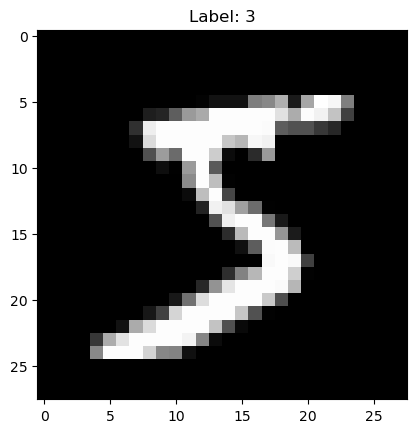

In [44]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the data
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

# Visualize the first image in the training set
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[500]}")
plt.show()


Now it is time to preprocess the data loaded from mnist

In [46]:
from keras.utils import to_categorical

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Bringing together the MODEL and the Data

In [58]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["Accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - Accuracy: 0.8171 - loss: 0.6158 - val_Accuracy: 0.9417 - val_loss: 0.1925
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.9441 - loss: 0.1896 - val_Accuracy: 0.9537 - val_loss: 0.1531
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Accuracy: 0.9596 - loss: 0.1376 - val_Accuracy: 0.9591 - val_loss: 0.1345
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.9669 - loss: 0.1116 - val_Accuracy: 0.9675 - val_loss: 0.1100
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Accuracy: 0.9710 - loss: 0.0918 - val_Accuracy: 0.9627 - val_loss: 0.1219
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.9755 - loss: 0.0797 - val_Accuracy: 0.9672 - val_loss: 0.1090
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.9785 - loss: 0.0679 - val_Accuracy: 0.9690 - val_loss: 0.1057
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.9828 - loss: 0.0566 - 

To save the model:

In [64]:
model.save("firstmodel.keras")
print("done")

done


In [ ]:
To use the model:

In [80]:
from keras.models import load_model
import numpy as np
from PIL import Image
first = load_model("firstmodel.keras")

# Define a function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels (MNIST format)
    img = np.array(img)  # Convert to numpy array
    img = img.astype('float32') / 255.0  # Normalize the image
    img = img.reshape((1, 784))  # Flatten the image to match the input shape
    return img

# Define a function to predict the digit
def predict_digit(model, image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class = np.argmax(prediction)
    return predicted_class

In [106]:
# Example usage
image_path = 'test9.jpg'  # Replace with your image file nam
predicted_digit = predict_digit(model, image_path)
print(f'Predicted digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted digit: 3
